# Set Covering Problem with Genetic Algorithm

In [2]:
import random
import logging
import matplotlib
import numpy as np
from numpy import append
from collections import Counter, namedtuple
from copy import copy
from matplotlib import pyplot as plt

In [3]:
def problem(N, seed=None):
    random.seed(seed)
    return [
        list(set(random.randint(0, N - 1) for n in range(random.randint(N // 5, N // 2))))
        for n in range(random.randint(N, N * 5))
    ]

### Begin  the algoritm

In [55]:
Individual = namedtuple('Individual',('genome','fitness'))
#Individual = one candidate solution with it's associated fitness
#genome = list/tuple of 0/1 that shows if a list in P=problem(N,seed) is taken or not
#fitness = weight associated to the solution

def is_valid(solution,P):
    return set(range(N)) == set(_ for el in solution for _ in el)

def evaluate(genome,P):
    solution = list()
    for i, el in enumerate(genome):
        if el == 1: solution.append(P[i])
    cnt=Counter()
    cnt.update(sum((e for e in solution), start=()))
    covered = len(cnt)
    #Add a penalty to the first element of the tuple if the solution is not valid
    if not is_valid(solution,P) : 
        covered = covered - N//2
    return covered, -sum(len(el) for el in solution)

def tournament(population, tournament_size=2):
    return max(random.choices(population, k=tournament_size), key=lambda i: i.fitness)

def crossover(g1,g2,len_P):    #pass the parents (individual) returns the child's genome
    cut = random.randint(0, len_P)
    return g1.genome[:cut] + g2.genome[cut:]



def mutation(g,len_P):
    point = random.randint(0, len_P - 1)
    return g[:point] + (1 - g[point],) + g[point + 1 :]






In [56]:
def genetic_algorithm(N,P,crossover_function=crossover):
    population_size = N
    offspring_size = N//2
    num_generations = 1000
    P = [tuple(_) for _ in P]
    problem_size=len(P)


    #Initial Population Functions
    population=list()
    def initialize_population(): #take about one third of the lists as part of the solution
        for _ in range(population_size):
            genome=list()
            for __ in range(problem_size):
                genome.append(0)
            genome=tuple(genome)
            population.append(Individual(genome,evaluate(genome,P)))
    initialize_population() #Individual(genome=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), fitness=(-2, 0))



    fitness_log = [(0, i.fitness[1]) for i in population]
    
    #Evolution
    for g in range(num_generations):
        offspring = list()
        for i in range(offspring_size):
            p = tournament(population)
            o = mutation(p.genome,problem_size)             
            f = evaluate(o,P)
            offspring.append(Individual(o, f))
            fitness_log.append((g + 1, -f[1]))
        population += offspring
        population = sorted(population, key=lambda i: i.fitness, reverse=True)[:population_size]
        
    
    if population[0].fitness[0] == N : logging.info(f' Solution found for N={N}: w={population[0].fitness} (bloat={int((-population[0].fitness[1]-N)*100/N)}%)')
    else : logging.info('Could not find a valid solution')
    return population[0], fitness_log

## Testing

In [57]:
logging.getLogger().setLevel(logging.INFO)
SEED = 42
for N in [5,10,20,100]:
    genetic_algorithm(N,problem(N,SEED),crossover)

INFO:root: Solution found for N=5: w=(5, -5) (bloat=0%)
INFO:root: Solution found for N=10: w=(10, -10) (bloat=0%)
INFO:root: Solution found for N=20: w=(20, -32) (bloat=60%)
INFO:root: Solution found for N=100: w=(100, -205) (bloat=105%)


### Explicit solution for N=20

In [38]:
N = 20
SEED = 42
P = problem(N,SEED)
sol,_ = genetic_algorithm(N,P,crossover)
solution = list()
for i, el in enumerate(sol.genome):
    if el==1: solution.append(P[i])
print(f'Solution for N={N}: w={-sol.fitness[1]} (bloat={int((-sol.fitness[1]-N)*100/N)}%)')
print(f'The solution is: {solution}')

INFO:root: Solution found for N=20: w=(20, -30) (bloat=50%)


Solution for N=20: w=30 (bloat=50%)
The solution is: [[0, 5, 7, 8, 13, 14, 17, 18], [2, 3, 4, 6, 8, 10], [2, 8, 12, 13, 14, 16, 17, 19], [0, 1, 3, 7, 9, 10, 11, 15]]


## Results


`INFO:root: Solution found for N=5: w=(5, -5) (bloat=0%)`\
`INFO:root: Solution found for N=10: w=(10, -10) (bloat=0%)`\
`INFO:root: Solution found for N=20: w=(20, -32) (bloat=60%)`\
`INFO:root: Solution found for N=100: w=(100, -205) (bloat=105%)`\
For higher population my CPU go up to 100% and it is not feasible due processor limitation

## Model convergence

### Problem whit 20

INFO:root: Solution found for N=20: w=(20, -30) (bloat=50%)


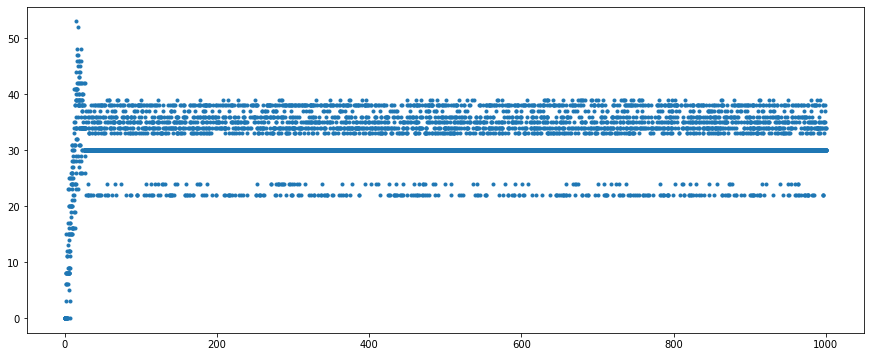

In [39]:
sol,fitness_log = genetic_algorithm(20,problem(20,SEED),crossover)
plt.figure(figsize=(15, 6))
plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".")

### Problem whit 50

INFO:root: Solution found for N=50: w=(50, -104) (bloat=108%)


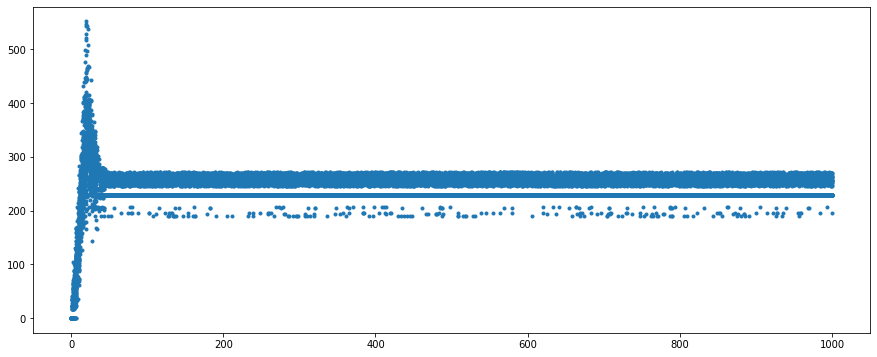

In [52]:
N = 50
SEED = 42
P = problem(N,SEED)
sol,_ = genetic_algorithm(N,P,crossover)
plt.figure(figsize=(15, 6))
plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".")

### Problem whit 100

INFO:root: Solution found for N=100: w=(100, -229) (bloat=129%)


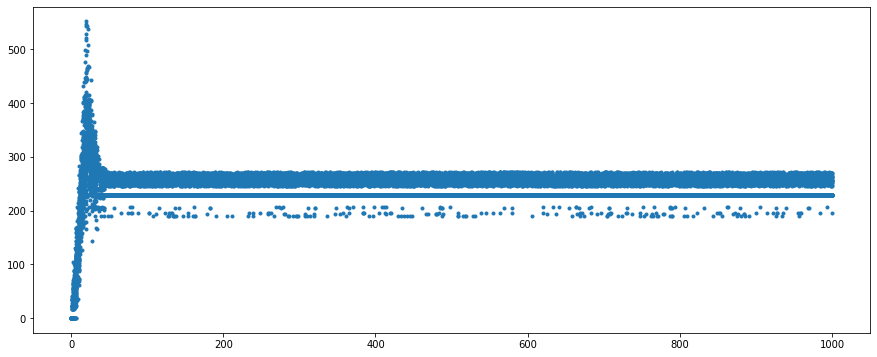

In [49]:
N = 100
SEED = 42
P = problem(N,SEED)
sol,_ = genetic_algorithm(N,P,crossover)
plt.figure(figsize=(15, 6))
plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".")